In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [33]:
#read data
data=pd.read_csv('Sample - Superstore.csv', encoding='windows-1252')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,1/7/2014,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,1/7/2014,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,1/8/2014,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,1/8/2014,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,1/8/2014,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [37]:
data['Customer ID'].value_counts()

WB-21850    37
JL-15835    34
MA-17560    34
PP-18955    34
CK-12205    32
            ..
LD-16855     1
AO-10810     1
CJ-11875     1
RE-19405     1
JR-15700     1
Name: Customer ID, Length: 793, dtype: int64

In [5]:
newdata=data.drop(['Row ID','Order ID','Customer Name','Order Date','Ship Date','Postal Code','Product ID','Customer ID','Product Name'], axis = 1)
newdata.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
#number of null values in each column 
data.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [21]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#select columns of type category 
catdata= newdata.select_dtypes(include=["object"])
catdata.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage


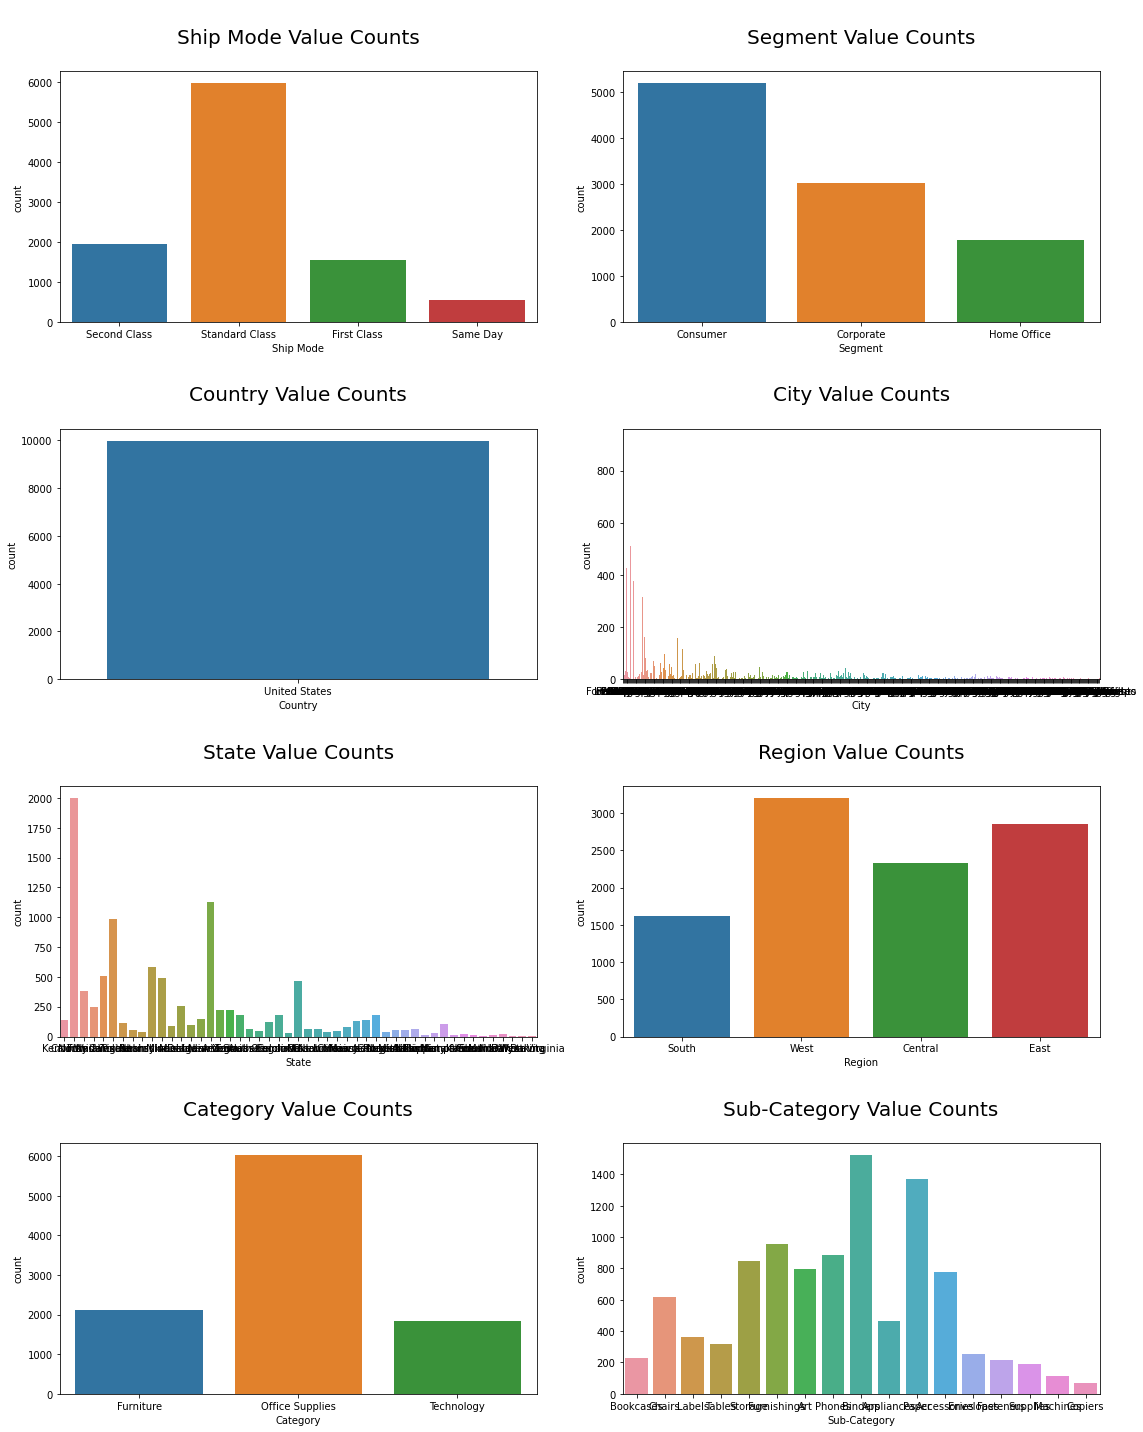

In [49]:
# plotting the countplot of each categorical column.
plt.figure(figsize = (16, 20))
for i in range(len(catdata.columns)):
  ax = plt.subplot(4, 2, i+1)
  sns.countplot(x = catdata.columns[i], data = data, ax = ax)
  plt.title(f"\n{catdata.columns[i]} Value Counts\n", fontsize = 20)      

plt.tight_layout()
plt.show()

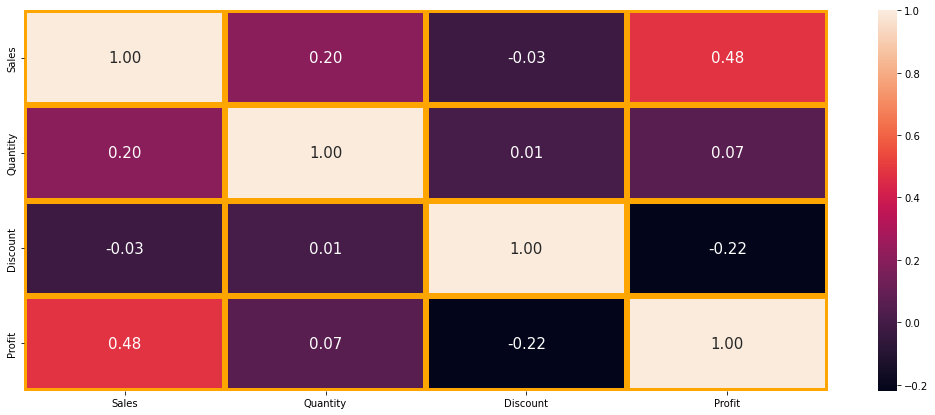

In [96]:
#show correlation between numerical columns
plt.figure(figsize = (18, 7))
sns.heatmap(newdata.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 5, linecolor = 'orange')
plt.show()

In [101]:
#draw a pie to show the number of each kind in category column
Categorydata = catdata['Category'].value_counts().reset_index()
Categorydata.columns = ['Category', 'value_counts']
fig = px.pie(Categorydata, names = 'Category', values = 'value_counts', 
             color_discrete_sequence = px.colors.sequential.matter_r, width = 650, height = 400,
             hole = 0.6)
fig.update_traces(textinfo = 'percent+label')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



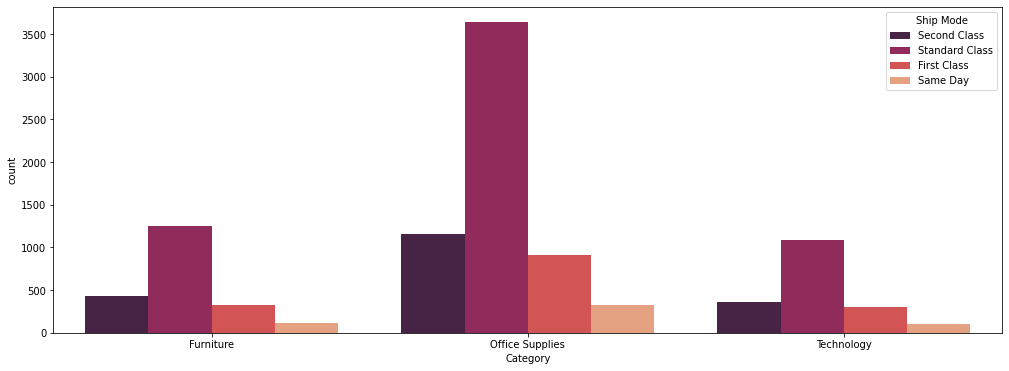

In [59]:
#plot the count of each category with its ship mode 
plt.figure(figsize = (17, 6))
sns.countplot('Category', hue = 'Ship Mode', data = data, palette='rocket')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



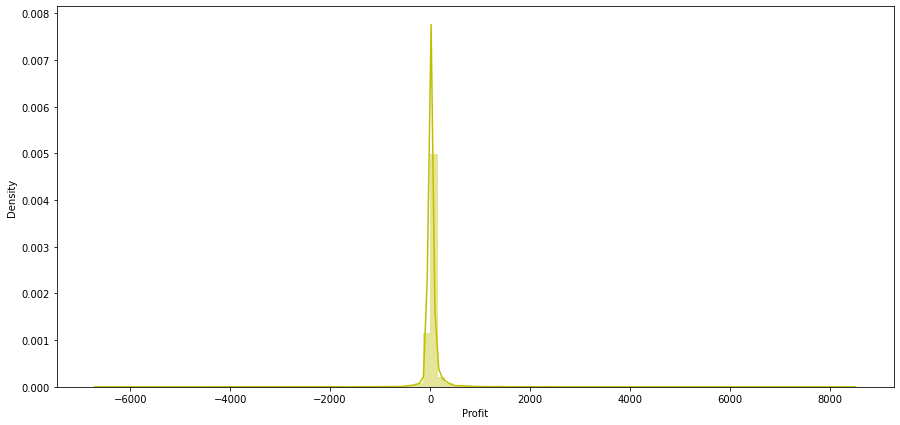

In [95]:
#show the density of profit  
plt.figure(figsize = (15, 7))
ax = sns.distplot(data['Profit'], bins = 100, color = 'y')
plt.show()

In [9]:
# looking at the relation between cost of the quantity and category using boxplot
px.box(data_frame = data, x = 'Category', y = 'Quantity', 
       color = 'Category', template = 'plotly_dark')

In [11]:
# plot the discount for each category using histogram 

px.histogram(data_frame = data, x = 'Discount', nbins = 100, color = 'Category',
             marginal = 'box', template = 'plotly_dark')

In [81]:
#create a new column 'trend' based on profit 
def trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x > 1 and x <= 10:
    return 'Positive 1-10'
  elif x > -10 and x <= -1:
    return 'Negative 1-10'
  elif x >= 10 and x < 30:
    return 'top gainers 10-30'
  elif x > -30 and x <= -10:
    return 'top losers 10-30'
  elif x > 30:
    return 'Bull run >30'
  elif x <= -30:
    return 'Bear drop >30'
newdata['Trend']= np.zeros(newdata['Profit'].count())
newdata['Trend']= newdata['Profit'].apply(lambda x:trend(x))
newdata.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Trend
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,Bull run >30
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,Bull run >30
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,Positive 1-10
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,Bear drop >30
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,Positive 1-10


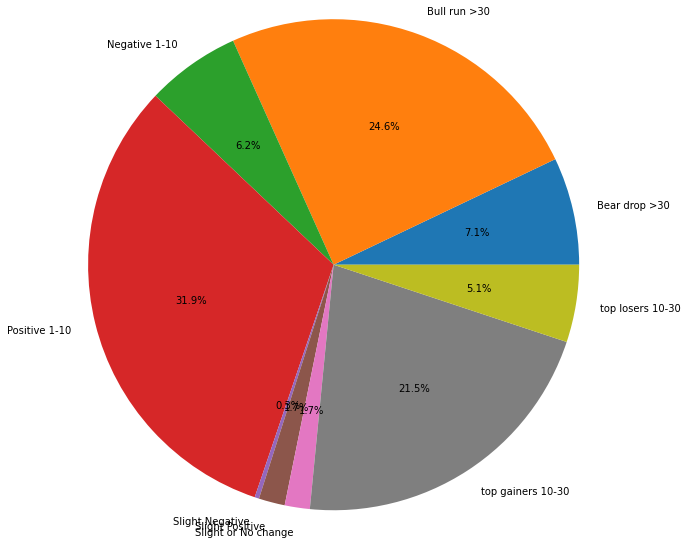

In [91]:
pie_data = newdata.groupby('Trend')
pie_label = sorted([i for i in newdata.loc[:, 'Trend'].unique()])
plt.pie(pie_data['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)
fig = plt.gcf()
fig.set_size_inches(5.5, 18.5)

plt.show()

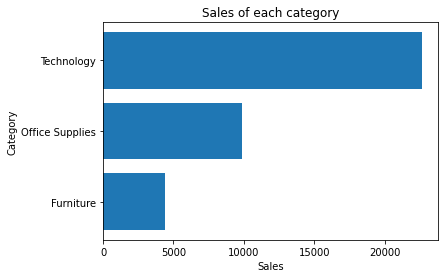

In [99]:
#plot the sales for each category 
#Creating bar plot
plt.barh(newdata['Category'],newdata['Sales']) 

#Adding the aesthetics
plt.title('Sales of each category')
plt.xlabel('Sales')
plt.ylabel('Category') 
# Show the plot
plt.show()

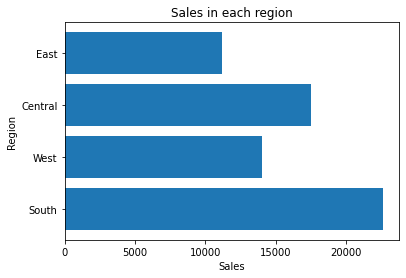

In [98]:
#plot the sales for each region 
#Creating bar plot
plt.barh(newdata['Region'],newdata['Sales']) 

#Adding the aesthetics
plt.title('Sales in each region')
plt.xlabel('Sales')
plt.ylabel('Region') 
# Show the plot
plt.show()

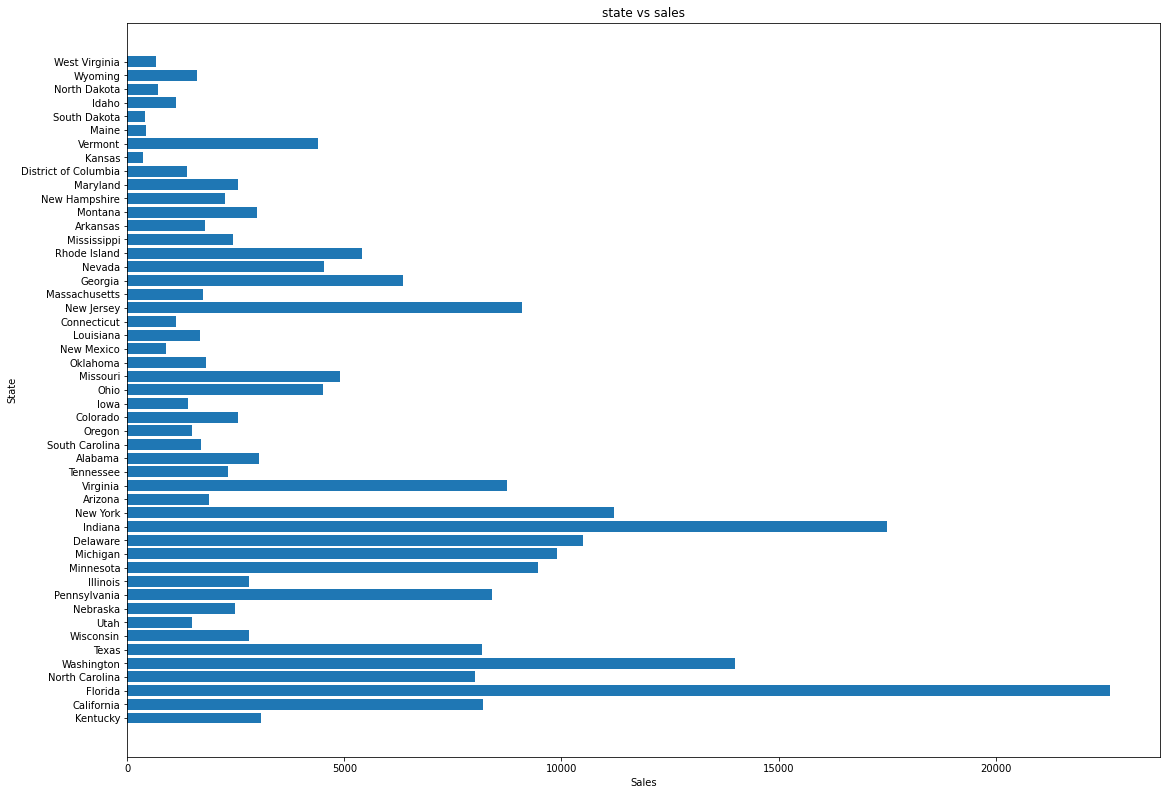

In [80]:
#plot the sales for each city
#Creating bar plot
plt.barh(newdata['State'],newdata['Sales']) 

#Adding the aesthetics
plt.title('state vs sales')
plt.xlabel('Sales')
plt.ylabel('State') 
# adjust size of the figure
fig = plt.gcf()
fig.set_size_inches(18.5, 13.5)
fig.savefig('test2png.png', dpi=100)
# Show the plot
plt.show()

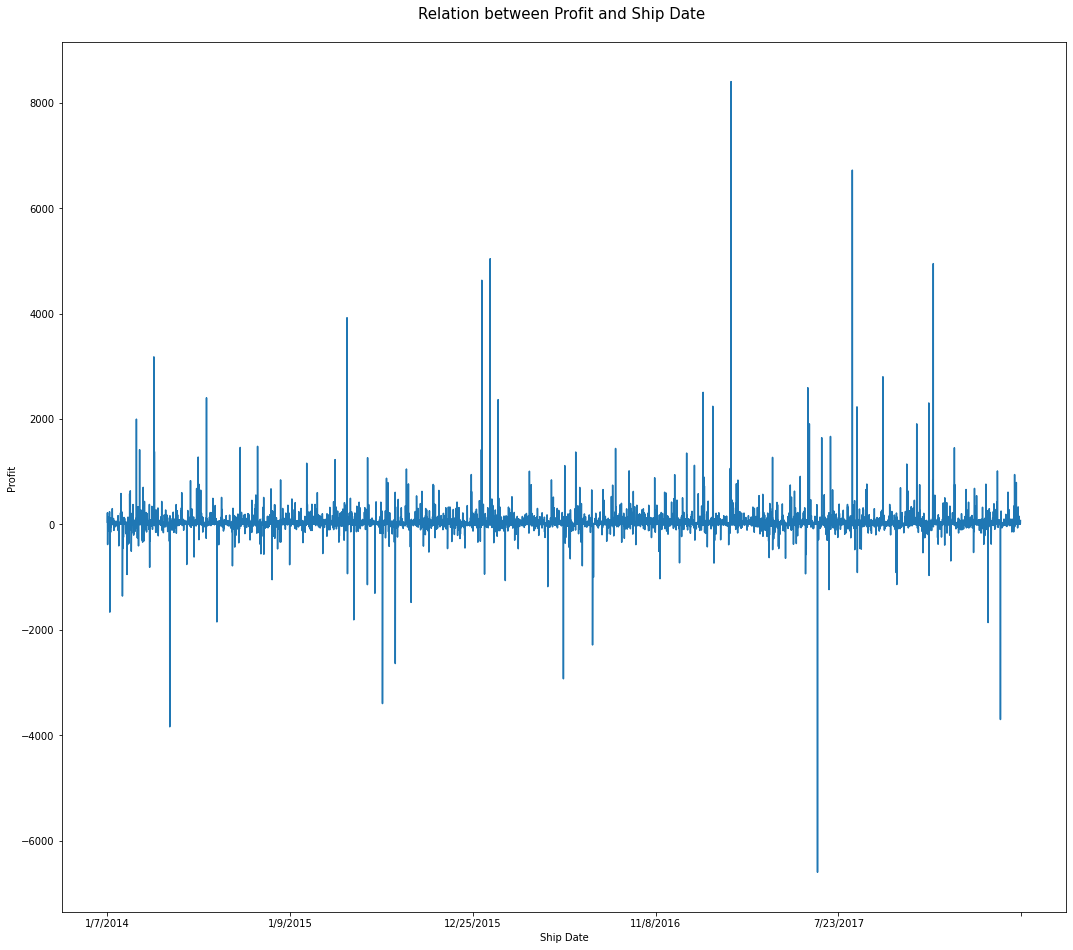

In [40]:
#plot relation between profit and data
data.index = data['Ship Date']
data['Profit'].plot(figsize = (18,16))
#Adding the aesthetics
plt.title('Relation between Profit and Ship Date \n',
          fontsize = 15)
plt.xlabel('Ship Date')
plt.ylabel('Profit') 
plt.show()

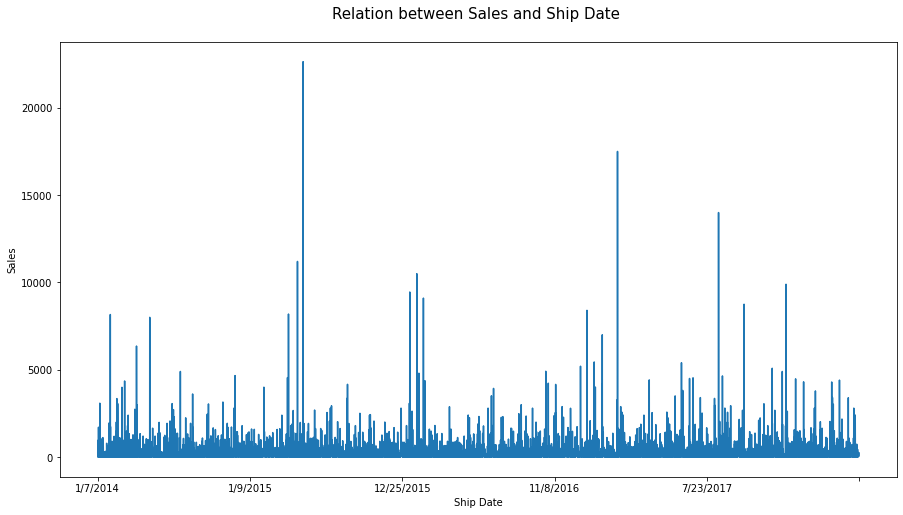

In [37]:
data.index = data['Ship Date']
data['Sales'].plot(figsize = (15,8))

plt.title('Relation between Sales and Ship Date \n',
          fontsize = 15)
plt.xlabel('Ship Date')
plt.ylabel('Sales') 
plt.show()

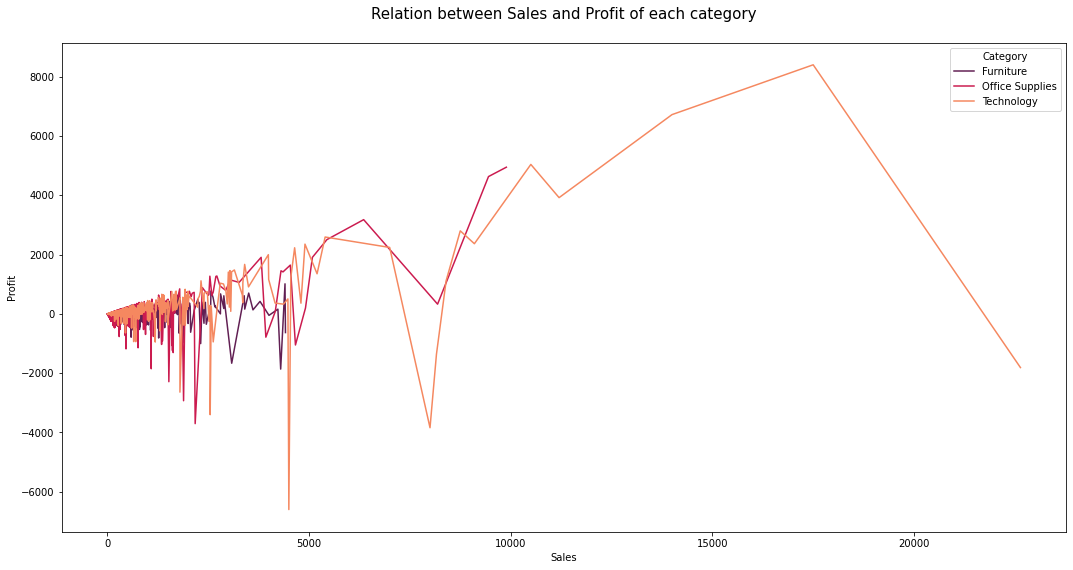

In [97]:
#Relation between Sales and Profit of each category
plt.figure(figsize = (18, 9))
sns.lineplot(x = 'Sales', y = 'Profit', hue = 'Category', data = newdata,
             palette = 'rocket', ci = 0)
plt.title('Relation between Sales and Profit of each category\n',
          fontsize = 15)
plt.show()